In [1]:
#Beschreibung: Stochastik Oszillator (K%D)und Preisänderungsrate bzw. Price Rate of Change (ROC) mit Facebook

In [2]:
#Import Libraries

import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [5]:
start = "2019-01-01"
end = datetime.today().strftime("%Y-%m-%d")

In [6]:
end

'2022-03-09'

In [7]:
df = web.DataReader("FB", data_source = "yahoo", start = start, end = end)

In [8]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
...,...,...,...,...,...,...
2022-03-02,209.149994,202.020004,204.779999,208.110001,29452100,208.110001
2022-03-03,209.080002,201.419998,209.020004,202.970001,27263500,202.970001
2022-03-04,205.889999,198.789993,202.369995,200.059998,32130900,200.059998


In [9]:
#Berechnung des Stochastik Oszillator (K%D)

n = 14

low_14 = df["Low"].copy()
high_14 = df["High"].copy()

low_14 = low_14.rolling(window=n).min()
high_14 = high_14.rolling(window=n).max()

k_percent = 100*((df["Adj Close"]-low_14)/(high_14-low_14))

df["k_percent"] = k_percent
df["d_percent"] = k_percent.rolling(window=3).mean()
df["low_14"] = low_14
df["high_14"] = high_14

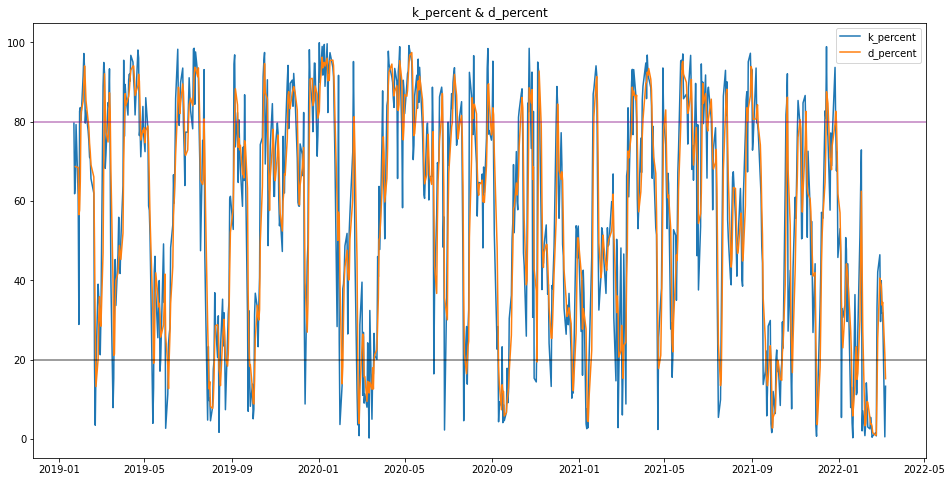

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df["k_percent"])
plt.plot(df["d_percent"])
plt.title("k_percent & d_percent")
plt.axhline(80, alpha = 0.5, color ="purple")
plt.axhline(20, alpha = 0.5, color ="black")
plt.legend(["k_percent", "d_percent"]);

In [11]:
#Preisänderungsrate (ROC)

M = df["Adj Close"].diff(n-1)
N = df["Adj Close"].shift(n-1)

ROC = ((M/N)*100)+100

df["ROC"] = ROC

In [12]:
df

,High,Low,Open,Close,Volume,Adj Close,k_percent,d_percent,low_14,high_14,ROC
Date,,,,,,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993,NaN,NaN,NaN,NaN,NaN
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005,NaN,NaN,NaN,NaN,NaN
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997,NaN,NaN,NaN,NaN,NaN
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003,NaN,NaN,NaN,NaN,NaN
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-02,209.149994,202.020004,204.779999,208.110001,29452100,208.110001,39.950871,38.685427,190.220001,235.000000,91.248298
2022-03-03,209.080002,201.419998,209.020004,202.970001,27263500,202.970001,31.716420,33.767022,190.220001,230.419998,92.448189
2022-03-04,205.889999,198.789993,202.369995,200.059998,32130900,200.059998,31.813769,34.493687,190.220001,221.149994,91.897106


In [13]:
df["ROC"].head(20)

Date
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
2019-01-08           NaN
2019-01-09           NaN
2019-01-10           NaN
2019-01-11           NaN
2019-01-14           NaN
2019-01-15           NaN
2019-01-16           NaN
2019-01-17           NaN
2019-01-18           NaN
2019-01-22    108.763278
2019-01-23    109.533928
2019-01-24    105.712218
2019-01-25    107.939146
2019-01-28    103.465939
2019-01-29     99.972271
2019-01-30    104.313454
Name: ROC, dtype: float64

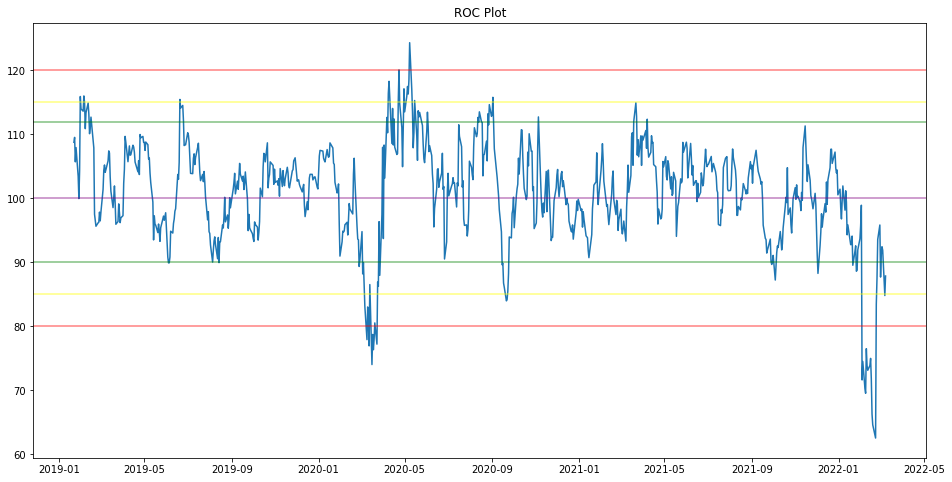

In [17]:
plt.figure(figsize=(16,8))
plt.plot(df["ROC"])
plt.title("ROC Plot")
plt.axhline(120, alpha=0.5, color="red")
plt.axhline(115, alpha=0.5, color="yellow")
plt.axhline(112, alpha=0.5, color="green")
plt.axhline(100, alpha=0.5, color="purple")
plt.axhline(90, alpha=0.5, color="green")
plt.axhline(85, alpha=0.5, color="yellow")
plt.axhline(80, alpha=0.5, color="red");
plt.show()